In [2]:
from transformers import GPT2LMHeadModel

In [4]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [11]:
sd_hf["transformer.wpe.weight"].shape, sd_hf["transformer.wpe.weight"].dtype

(torch.Size([1024, 768]), torch.float32)

In [5]:
sd_hf["transformer.wpe.weight"].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

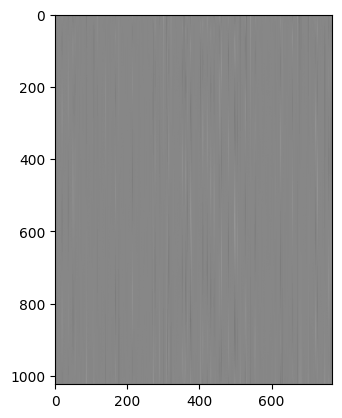

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_hf["transformer.wpe.weight"], cmap="gray")

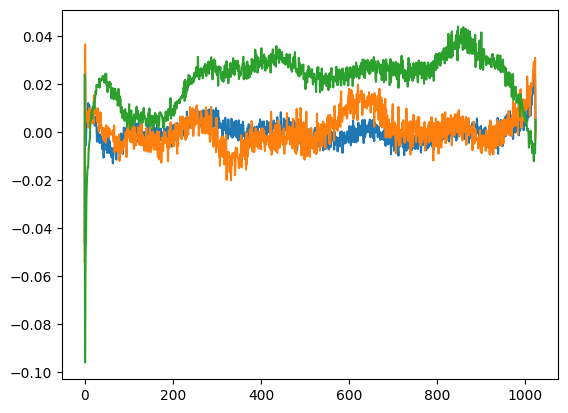

In [13]:
plt.plot(sd_hf["transformer.wpe.weight"][:, 150])
plt.plot(sd_hf["transformer.wpe.weight"][:, 200])
plt.plot(sd_hf["transformer.wpe.weight"][:, 250])

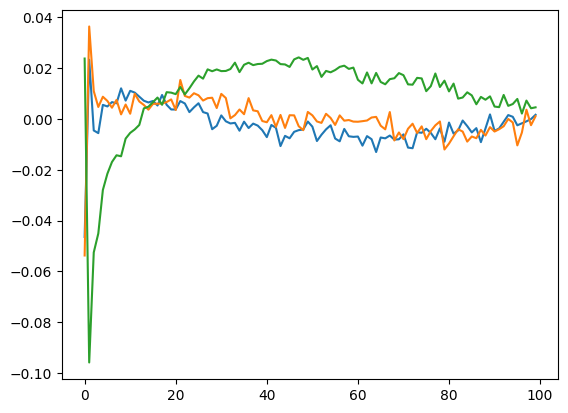

In [19]:
plt.plot(sd_hf["transformer.wpe.weight"][:100, 150])
plt.plot(sd_hf["transformer.wpe.weight"][:100, 200])
plt.plot(sd_hf["transformer.wpe.weight"][:100, 250])

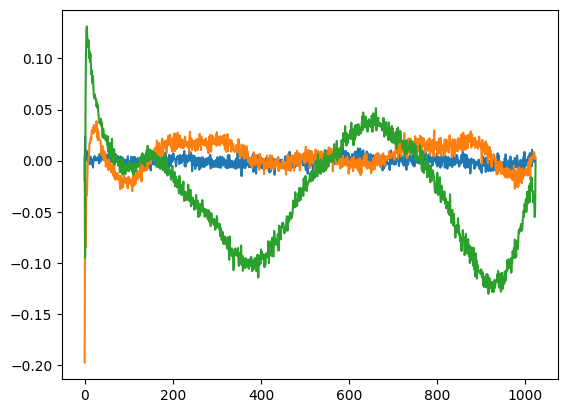

In [14]:
plt.plot(sd_hf["transformer.wpe.weight"][:, 0])
plt.plot(sd_hf["transformer.wpe.weight"][:, 1])
plt.plot(sd_hf["transformer.wpe.weight"][:, 2])

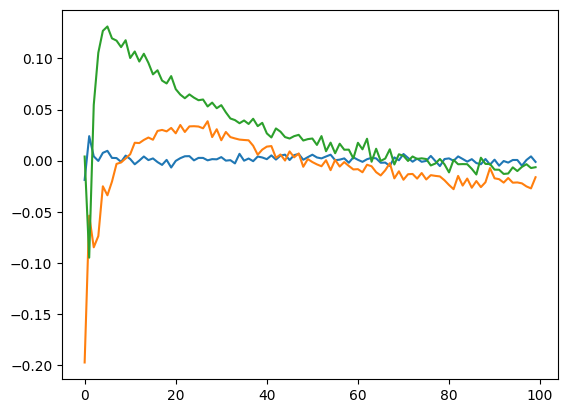

In [18]:
plt.plot(sd_hf["transformer.wpe.weight"][:100, 0])
plt.plot(sd_hf["transformer.wpe.weight"][:100, 1])
plt.plot(sd_hf["transformer.wpe.weight"][:100, 2])
plt.show()

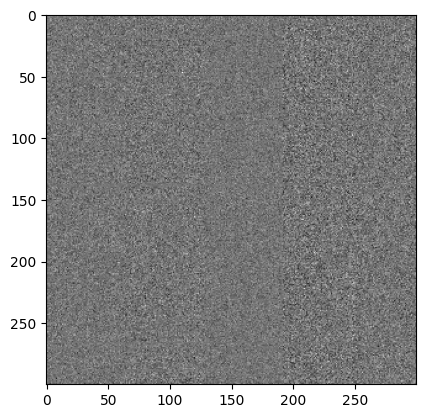

In [20]:
plt.imshow(sd_hf["transformer.h.0.attn.c_attn.weight"][:300, :300], cmap="gray")

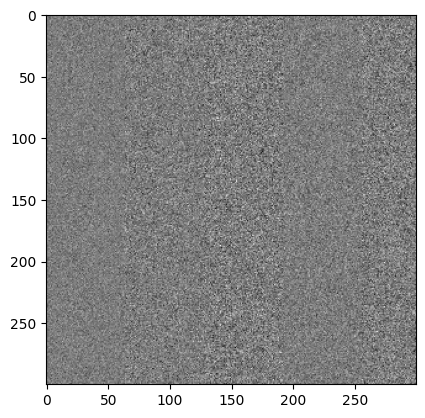

In [22]:
plt.imshow(sd_hf["transformer.h.2.attn.c_attn.weight"][:300, :300], cmap="gray")

In [23]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model="gpt2")
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, but what I'm really doing is making a human-readable document. There are other languages, but those are"},
 {'generated_text': "Hello, I'm a language model, not a syntax model. That's why I like it. I've done a lot of programming projects.\n"},
 {'generated_text': "Hello, I'm a language model, and I'll do it in no time!\n\nOne of the things we learned from talking to my friend"},
 {'generated_text': "Hello, I'm a language model, not a command line tool.\n\nIf my code is simple enough:\n\nif (use (string"},
 {'generated_text': "Hello, I'm a language model, I've been using Language in all my work. Just a small example, let's see a simplified example."}]

In [24]:
generator("Hello, I'm Manikanth Reddy',", max_length=30, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm Manikanth Reddy', there's no reason not to try! Also, thanks for stopping by my blog this weekend, your"},
 {'generated_text': 'Hello, I\'m Manikanth Reddy\', "the voice in my head"\n\n\'We\'re All In It\'\n\n\'What'},
 {'generated_text': "Hello, I'm Manikanth Reddy', you're a bit weird, right?\n\nMarnie: Yeah.\n\nTIM"},
 {'generated_text': "Hello, I'm Manikanth Reddy', so that makes me like my new favorite anime.\n\nSo I have two projects under my belt"},
 {'generated_text': "Hello, I'm Manikanth Reddy', the only other person to have a character in the Superbowl. What would this character look like?"}]

In [27]:
generator("Hello, I am Manikanth Reddy, a Machine Learning Engineer.',", max_length=100, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Hello, I am Manikanth Reddy, a Machine Learning Engineer.\', "What does it mean to be in the business of Artificial Intelligence?"\n\nAs for how the AI industry should move forward as a whole, the answer is simple: No, it simply needs to do its best in business. However, in the next 5 years, all the machines and their insights will be automated in the service sector, by providing artificial intelligence services such as speech and AI-driven products such as speech'},
 {'generated_text': "Hello, I am Manikanth Reddy, a Machine Learning Engineer.',\n\na 'Senior Citizen'\n\nIn 2014, a number of 'Senior Citizen' organisations had adopted 'Machine Learning' as the main standard of learning. But it was not until earlier this year that the Machine Learning Foundation realised that the idea was being used too much, and decided to introduce the concept to all its employees (both within the organisation as well as within the company itself).\n\nToday, the"},
 {'generated_tex